# Importação de dados

Primeiro, como estou utilizando google colab, subirei o arquivo csv para o ambiente para poder ser acessado pelo notebook:

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


Agora, basta ler o arquivo para ter acesso aos dados que serão trabalhados

In [4]:
import pandas as pd

dataframe = pd.read_csv('Iris.csv')


In [5]:
# print(dataframe)
print('Head: ')
print(dataframe.head())
print('--------------------------------------------------------------------')
print('Describe: ')
print(dataframe.describe())
print('--------------------------------------------------------------------')
print('Info: ')
print(dataframe.info())

Head: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
--------------------------------------------------------------------
Describe: 
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.30

No campo info observamos que todas as colunas possuem 150 valores non-null, ou seja, todas as flores possuem todos os dados, de forma que não é necessário um pre-tratamento dos dados para treinamento e teste do modelo de ML.

# Treinamento

Agora dividiremos nossa tabela de dados entre os dados específicos de cada flor em 'resources' e os rótulos (espécie da flor) em 'labels'

In [6]:
resources = dataframe[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]
labels = dataframe['Species']

In [7]:
print('Resources: ')
print(resources)
print('--------------------------------------------------------------------')
print('Labels')
print(labels)

Resources: 
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
0              1.4           0.2            5.1           3.5
1              1.4           0.2            4.9           3.0
2              1.3           0.2            4.7           3.2
3              1.5           0.2            4.6           3.1
4              1.4           0.2            5.0           3.6
..             ...           ...            ...           ...
145            5.2           2.3            6.7           3.0
146            5.0           1.9            6.3           2.5
147            5.2           2.0            6.5           3.0
148            5.4           2.3            6.2           3.4
149            5.1           1.8            5.9           3.0

[150 rows x 4 columns]
--------------------------------------------------------------------
Labels
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-

Agora dividiremos nossas flores entre dados que serão utilizados para treinar o modelo e dados para testar o modelo treinado (90% para treinar e 10% para testar)

In [8]:
from sklearn.model_selection import train_test_split

train_size = 0.9  # 90% dos dados serão usados para treinamento

resources_train, resources_test, labels_train, labels_test = train_test_split(resources, labels, test_size=(1 - train_size), random_state=42)

In [9]:
print('Treinamento: ')
print(resources_train)
print('-----------------')
print(labels_train)

Treinamento: 
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
56             4.7           1.6            6.3           3.3
104            5.8           2.2            6.5           3.0
69             3.9           1.1            5.6           2.5
55             4.5           1.3            5.7           2.8
132            5.6           2.2            6.4           2.8
..             ...           ...            ...           ...
71             4.0           1.3            6.1           2.8
106            4.5           1.7            4.9           2.5
14             1.2           0.2            5.8           4.0
92             4.0           1.2            5.8           2.6
102            5.9           2.1            7.1           3.0

[135 rows x 4 columns]
-----------------
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-

In [10]:
print('Teste: ')
print(resources_test)
print('-----------------')
print(labels_test)

Teste: 
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
73             4.7           1.2            6.1           2.8
18             1.7           0.3            5.7           3.8
118            6.9           2.3            7.7           2.6
78             4.5           1.5            6.0           2.9
76             4.8           1.4            6.8           2.8
31             1.5           0.4            5.4           3.4
64             3.6           1.3            5.6           2.9
141            5.1           2.3            6.9           3.1
68             4.5           1.5            6.2           2.2
82             3.9           1.2            5.8           2.7
110            5.1           2.0            6.5           3.2
12             1.4           0.1            4.8           3.0
36             1.3           0.2            5.5           3.5
9              1.5           0.1            4.9           3.1
19             1.5           0.3            5.1           3.8


Agora estamos prontos para o treinamento de um modelo inicial.
O modelo escolhido foi Árvore de Decisão por sua interpretabilidade, capacidade de lidar com relacionamentos não lineares, robustez a outliers, flexibilidade no pré-processamento de dados e habilidade de lidar com variáveis categóricas.

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(resources_train, labels_train)

DecisionTreeClassifier()

Pronto! Temos um modelo de inteligência artificial capaz de, a partir de dados sobre uma flor, deduzir a qual das 3 espécies ela pertence.

# Métricas

Utilizando o grupo de dados que separamos para testes, podemos medir a precisão do nosso modelo fazendo a previsão de quais são as espécies das flores desse grupo e comparando com seus rótulos (que já possuímos).

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Faça previsões
labels_prediction = model.predict(resources_test)

# Calcule a precisão comparando as labels separadas de antemão com as labels obtidas através das previsões
accuracy = accuracy_score(labels_test, labels_prediction)
print(f'Precisão: {accuracy:.2f}')

print('-------------------------------------------')
print(f'Outras métricas: ')
print(classification_report(labels_test, labels_prediction))
print('-------------------------------------------')
print(f'Matriz de confusão: ')
print(confusion_matrix(labels_test, labels_prediction))

Precisão: 1.00
-------------------------------------------
Outras métricas: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

-------------------------------------------
Matriz de confusão: 
[[6 0 0]
 [0 6 0]
 [0 0 3]]


# Visualização

A visualização da Árvore de Decisão pode ser uma ferramenta poderosa para entender como o modelo toma decisões. Para isso utilizaremos a biblioteca matplotlib

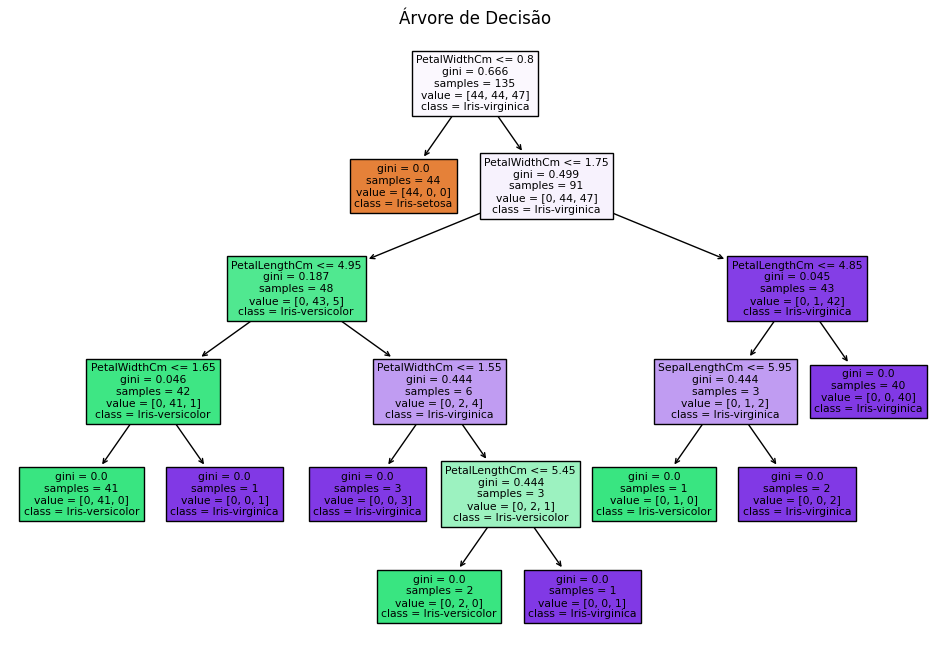

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names= resources.columns, class_names=model.classes_)
plt.title("Árvore de Decisão")
plt.show()


As cores nessa visualização tem um significado definido.

1.   Laranja: Iris-setosa
2.   Verde: Iris-versicolor
3.   Roxo: Iris-Virginica

Quanto mais sólida a cor, maior a probabilidade daquela flor ser da espécie definida pela cor.



# Aplicação


Agora que temos um modelo capaz de entender qual a especie de uma dada flor, podemos utilizá-lo na prática para identificar flores encontradas a qualquer momento, basta inputar as medidas da mesma(em cm).

In [14]:
print('Comprimento da sépala:')
sepal_length = input()
sepal_length= float(sepal_length)

print('Largura da sépala:')
sepal_width = input()
sepal_width= float(sepal_width)


print('Comprimento da pétala:')
petal_length = input()
petal_length= float(petal_length)


print('Largura da pétala:')
petal_width = input()
petal_width= float(petal_width)


new_flower = pd.DataFrame({'PetalLengthCm': [petal_length], 'PetalWidthCm': [petal_width], 'SepalLengthCm': [sepal_length], 'SepalWidthCm': [sepal_width]})
predicted_species = model.predict(new_flower)
print(f"A espécie prevista da flor é: {predicted_species[0]}")



Comprimento da sépala:
2
Largura da sépala:
3
Comprimento da pétala:
4
Largura da pétala:
5
A espécie prevista da flor é: Iris-versicolor
